In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# read the dataset
df = pd.read_csv('customer.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
# divide the dataset into dependent and independent variables
X = df[['Time on App','Time on Website','Avg. Session Length','Length of Membership']]
y = df['Yearly Amount Spent']

print(X.head())
print(y.head())

   Time on App  Time on Website  Avg. Session Length  Length of Membership
0    12.655651        39.577668            34.497268              4.082621
1    11.109461        37.268959            31.926272              2.664034
2    11.330278        37.110597            33.000915              4.104543
3    13.717514        36.721283            34.305557              3.120179
4    12.795189        37.536653            33.330673              4.446308
0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64


In [5]:
# training and testing split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (350, 4)
X_test shape: (150, 4)
y_train shape: (350,)
y_test shape: (150,)


In [7]:
# perform scaling on the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# train the regression model
regression = LinearRegression()
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
# model coefficients
regression.coef_

array([38.74324339,  0.46854792, 25.46811442, 63.35347072])

In [27]:
coef = pd.DataFrame(regression.coef_,X.columns,columns=['Coef'])
coef

,Coef
Time on App,38.743243
Time on Website,0.468548
Avg. Session Length,25.468114
Length of Membership,63.353471


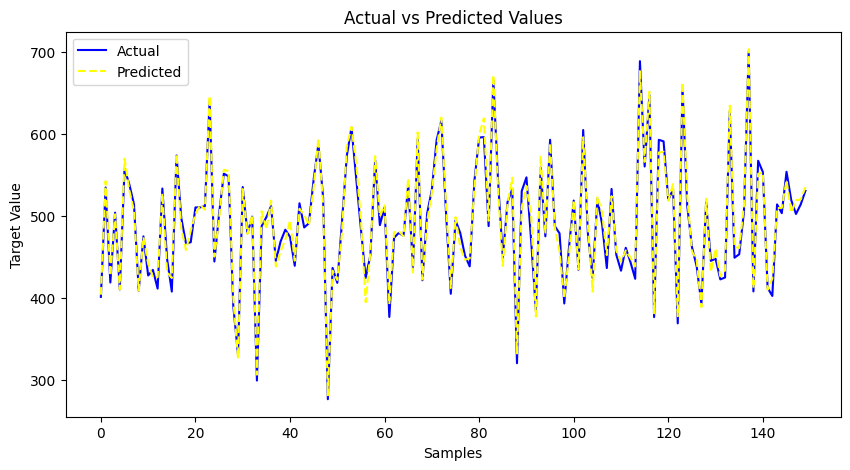

In [17]:
# make predictions
# plot the predicted values againts the actual values
y_pred = regression.predict(X_test)

plt.figure(figsize=(10,5))

plt.plot(y_test.values, label="Actual", color='blue')

plt.plot(y_pred, label="Predicted", color='yellow', linestyle='--')

plt.title("Actual vs Predicted Values")
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.legend()
plt.show()

In [22]:
## evaluate the performance
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)
print("R2 Score : ", r2)

Mean Squared Error :  103.9155413650332
Root Mean Squared Error :  10.19389726086315
R2 Score :  0.9808757641125855


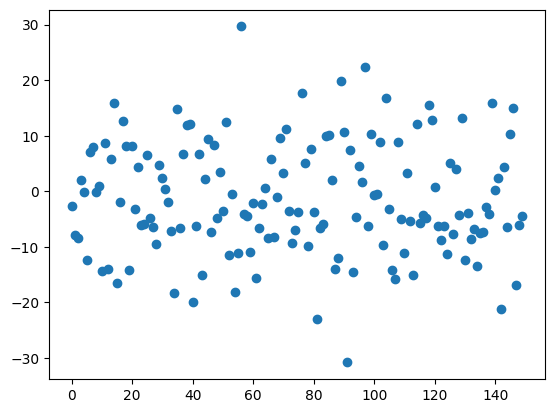

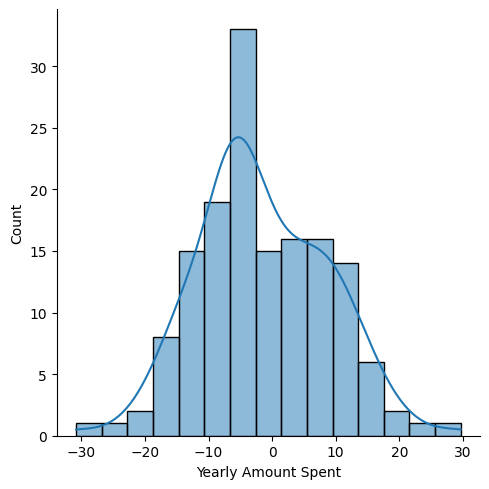

In [ ]:
# scatter plot
residuals = y_test-y_pred
plt.scatter(np.arange(y_test.size),residuals)
sns.displot(residuals,bins=15,kde=True) ## near normal distribution of residuals
plt.show()

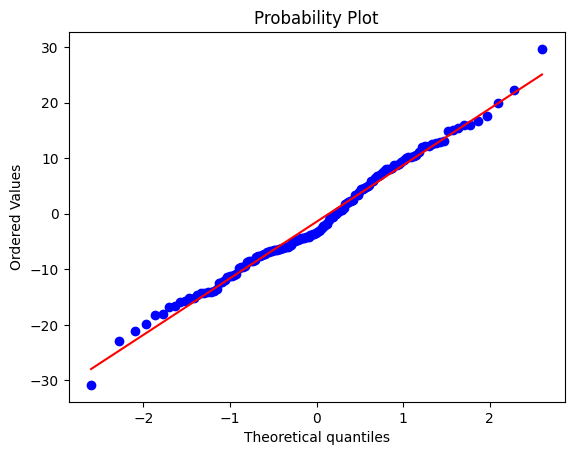

In [41]:
import pylab
import scipy.stats as stats

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()